# Instagram t-test Example

Import necessary libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Change working directory

In [2]:
os.chdir("/Users/nstevens/Dropbox/Teaching/MSDS_629/2024/Lectures/Lecture2")

Read in the data

In [3]:
data = pd.read_csv('./data/instagram.csv')
data.head(10)

,Condition_1,Condition_2
0,5.737292,2.893295
1,4.717812,3.286281
2,4.564710,5.229864
3,4.544233,2.187235
4,5.467858,2.864071
5,5.171533,2.662572
6,5.062347,1.514295
7,6.521562,1.648288
8,4.086958,1.490161
9,5.066496,2.300139


In [4]:
len(data)

500

Visualize the data

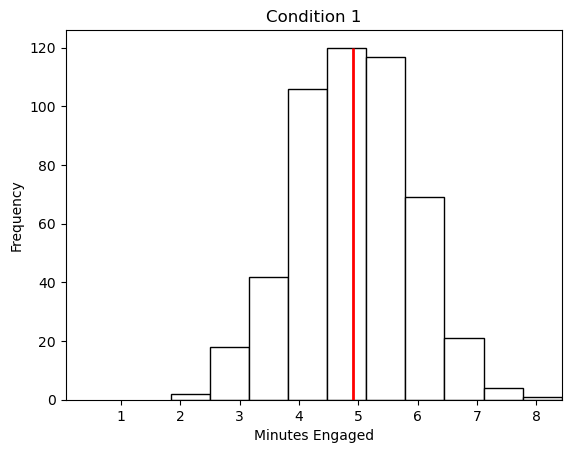

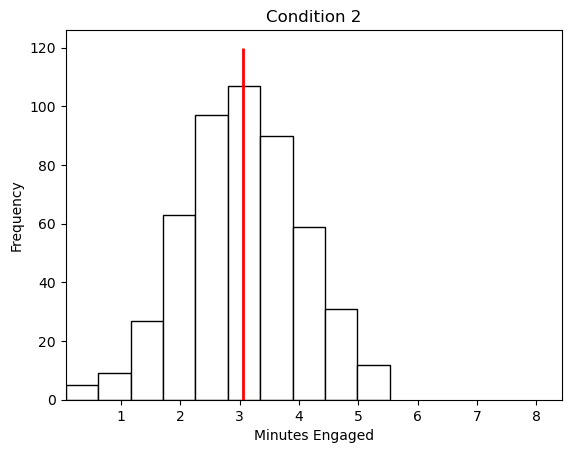

In [4]:
cond1 = data["Condition_1"]
cond2 = data["Condition_2"]
xmin = min(min(cond1), min(cond2))
xmax = max(max(cond1), max(cond2))
plt.figure()
plt.hist(cond1, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("Condition 1")
plt.vlines(x = np.mean(cond1), ymin = 0, ymax = 120, color = "red", linewidth = 2)
plt.figure()
plt.hist(cond2, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("Condition 2")
plt.vlines(x = np.mean(cond2), ymin = 0, ymax = 120, color = "red", linewidth = 2)

First test the equality of variances. First calculate the test statistic:

In [5]:
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)

t = 0.9376042331476527


In [3]:
t = 18**2/15**2
print("t =", t)

t = 1.44


In [5]:
var = 18**2/345 + 15**2/345
t = (108 - 112)/pow(var, 0.5)
t

-3.170905991785813

Now calculate the p-value:

In [6]:
pv = stats.f.cdf(t, dfn=499, dfd=499) + 1 - stats.f.cdf(1/t, dfn=499, dfd=499)
print("p-value =", pv)

p-value = 0.4720322651957777


This p-value so large that we do not reject $H_0:\sigma_1^2=\sigma_2^2$, and so we will use Student's t-test to test hypotheses concerning $\mu_1$ and $\mu_2$. Let us first test $$H_0:\mu_1=\mu_2 \text{ vs. }H_A:\mu_1\neq\mu_2$$

In [7]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'two-sided')
print("t =", t)
print("p-value =", pv)

t = 30.101282020428048
p-value = 3.676714426109119e-142


This is an extremely small p-value, providing very strong evidence against the null hypothesis above. This suggests that there is a significant difference in average engagement between the two ad frequency conditions.

Next let us test $$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$

In [8]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 30.101282020428048
p-value = 1.8383572130545597e-142


This is an extremely small p-value, providing very strong evidence against the null hypothesis above, suggesting that the average engagement time is larger in the 7:1 condition than in the 4:1 condition. 

Finally let us test $$H_0:\mu_1\geq\mu_2 \text{ vs. }H_A:\mu_1<\mu_2$$

In [9]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = 30.101282020428048
p-value = 1.0


This is an extremely large p-value, providing no evidence against the null hypothesis above, suggesting that average engagement time in the 7:1 condition could be greater than or equal to that of the 4:1 condition.